<a href="https://colab.research.google.com/github/RiddhimaMisra/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X_tr = pd.read_csv("/content/X_train.csv")
X_te = pd.read_csv("/content/X_test.csv")
Y_train = pd.read_csv("/content/Y_Train.csv")
Y_test = pd.read_csv("/content/Y_test.csv")

In [ ]:
X_tr.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C


In [ ]:
#Dropping unwanted culumn
X_tr = X_tr.drop("PassengerId", axis=1)
X_te = X_te.drop("PassengerId", axis=1)
Y_train = Y_train.drop("PassengerId", axis=1)
Y_test = Y_test.drop("PassengerId", axis=1)

In [ ]:
#Converting non categorial data into categorial dataset
X_tr_dum = X_tr.replace(to_replace={'Sex': {'female': 1,'male':0}})
em_dum = X_tr_dum.replace(to_replace={'Embarked': {'S': 0,'C': 1, 'Q': 2}})
X_train = em_dum

X_te_dum = X_te.replace(to_replace={'Sex': {'female': 1,'male':0}})
em_dumm = X_te_dum.replace(to_replace={'Embarked': {'S': 0,'C': 1, 'Q': 2}})
X_test = em_dumm

In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


###Cleaning of Dataset

In [ ]:
m = X_train['Age'].mean()
print(m)
mm = X_test['Age'].mean()
print(mm)
mmm = X_test['Fare'].mean()
print(mmm)

29.69911764705882
30.272590361445783
35.627188489208635


In [ ]:
X_train['Age'] = X_train['Age'].replace(np.nan, 29)
X_test['Age'] = X_test['Age'].replace(np.nan, 30)
X_test['Fare'] = X_test['Fare'].replace(np.nan, 36)
X_train['Embarked'] = X_train['Embarked'].replace(np.nan, 2)

In [ ]:
#Converting into Numpy Array
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [ ]:
#Reshaping the dataset
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [ ]:
print ("shape of X_train:", X_train.shape)
print ("shape of X_test:", X_test.shape)
print ("shape of Y_train:", Y_train.shape)
print ("shape of Y_test:", Y_test.shape)

shape of X_train: (7, 891)
shape of X_test: (7, 418)
shape of Y_train: (1, 891)
shape of Y_test: (1, 418)


## ▶**MODEL**

In [ ]:
def sigmoid(x):  #Creating Sigmoid Function(1/1+x exp-z)
    return 1/(1 + np.exp(-x))

In [ ]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]    #Number of observation
    n = X_train.shape[0]    #Number of features
    
    W = np.zeros((n,1))     #Initializing W with 0
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [ ]:
iterations = 1000000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after 0 iteration is :  0.6931471805599454
cost after 100000 iteration is :  0.4439494801684318
cost after 200000 iteration is :  0.4416033479798273
cost after 300000 iteration is :  0.44102169076411346
cost after 400000 iteration is :  0.4408761559208333
cost after 500000 iteration is :  0.4408395116557002
cost after 600000 iteration is :  0.4408302481059657
cost after 700000 iteration is :  0.44082790113893994
cost after 800000 iteration is :  0.44082730583269664
cost after 900000 iteration is :  0.4408271547436096


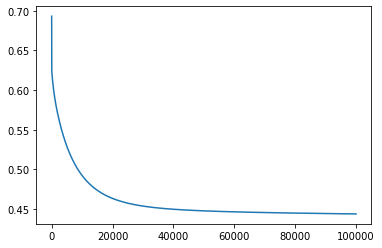

In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [ ]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5           #Probability
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [ ]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  94.74 %
